<a href="https://colab.research.google.com/github/amitpal16181/deepmindAICoursera_codePractice/blob/main/coursera_week4_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: ImageDataGenerator with a Validation Set

In this lab, you will continue using the `ImageDataGenerator` class to prepare the `Horses or Humans` dataset. This time, you will add a validation set so you can also measure how well the model performs on data it hasn't seen.

**IMPORTANT NOTE:** This notebook is designed to run as a Colab. Running it on your local machine might result in some of the code blocks throwing errors.

Run the code blocks below to download the datasets `horse-or-human.zip` and `validation-horse-or-human.zip` respectively.

In [1]:
# Download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

--2022-12-20 18:43:04--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.127.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M  41.7MB/s    in 4.0s    

2022-12-20 18:43:08 (35.5 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]



In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-12-20 18:43:08--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.69.128, 108.177.127.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘validation-horse-or-human.zip’

validation-horse-or 100%[===================>]  10.95M  15.6MB/s    in 0.7s    

2022-12-20 18:43:09 (15.6 MB/s) - ‘validation-horse-or-human.zip’ saved [11480187/11480187]



Then unzip both archives.

In [3]:
import zipfile

# Unzip training set
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

Similar to the previous lab, you will define the directories containing your images. This time, you will include those with validation data.

In [4]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

Now see what the filenames look like in these directories:

In [5]:
train_horse_names = os.listdir(train_horse_dir)
print(f'TRAIN SET HORSES: {train_horse_names[:10]}')

train_human_names = os.listdir(train_human_dir)
print(f'TRAIN SET HUMANS: {train_human_names[:10]}')

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

TRAIN SET HORSES: ['horse35-3.png', 'horse40-0.png', 'horse42-7.png', 'horse06-6.png', 'horse14-8.png', 'horse22-3.png', 'horse08-5.png', 'horse30-8.png', 'horse01-2.png', 'horse15-4.png']
TRAIN SET HUMANS: ['human13-15.png', 'human06-14.png', 'human03-20.png', 'human17-30.png', 'human06-00.png', 'human16-29.png', 'human10-22.png', 'human11-11.png', 'human14-02.png', 'human12-27.png']
VAL SET HORSES: ['horse2-112.png', 'horse5-018.png', 'horse4-188.png', 'horse5-100.png', 'horse3-099.png', 'horse2-294.png', 'horse2-218.png', 'horse4-389.png', 'horse2-412.png', 'horse4-588.png']
VAL SET HUMANS: ['valhuman02-21.png', 'valhuman04-12.png', 'valhuman04-10.png', 'valhuman03-09.png', 'valhuman02-11.png', 'valhuman01-18.png', 'valhuman03-06.png', 'valhuman02-13.png', 'valhuman03-11.png', 'valhuman01-03.png']


You can find out the total number of horse and human images in the directories:

In [6]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 527
total validation horse images: 128
total validation human images: 128


Now take a look at a few pictures to get a better sense of what they look like. First, configure the `matplotlib` parameters:

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 horse and 8 human pictures. You can rerun the cell to see a fresh batch each time:

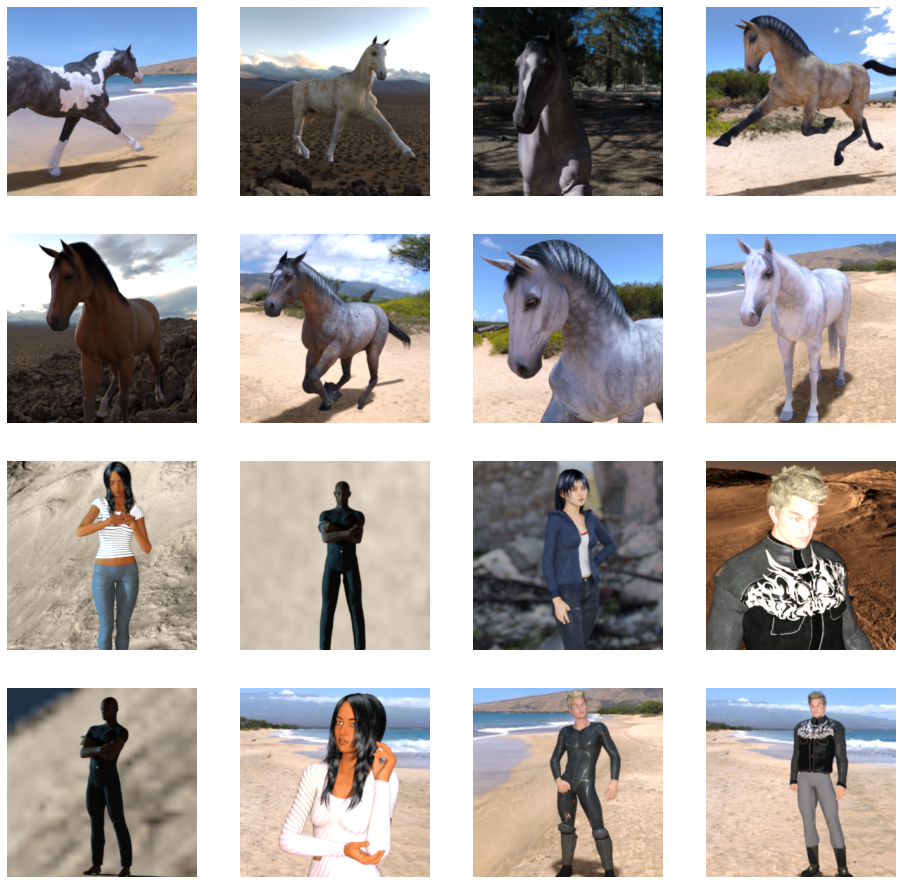

['./horse-or-human/horses/horse35-3.png', './horse-or-human/horses/horse40-0.png', './horse-or-human/horses/horse42-7.png', './horse-or-human/horses/horse06-6.png', './horse-or-human/horses/horse14-8.png', './horse-or-human/horses/horse22-3.png', './horse-or-human/horses/horse08-5.png', './horse-or-human/horses/horse30-8.png', './horse-or-human/humans/human13-15.png', './horse-or-human/humans/human06-14.png', './horse-or-human/humans/human03-20.png', './horse-or-human/humans/human17-30.png', './horse-or-human/humans/human06-00.png', './horse-or-human/humans/human16-29.png', './horse-or-human/humans/human10-22.png', './horse-or-human/humans/human11-11.png']


In [8]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = 0
next_horse_pic = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[pic_index: pic_index + 8]]
next_human_pic = [os.path.join(train_human_dir, fname) for fname in train_human_names[pic_index: pic_index + 8]]

# print(next_horse_pic)   # List containing file paths in directory for seven horse pictures
# print(next_human_pic)   # List containing file paths in directory for seven human pictures

for i, img_path in enumerate(next_horse_pic + next_human_pic):
  # Setting up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()
print(next_horse_pic + next_human_pic)    # List containing combined file paths in directory for seven horse and human

## Building a Small Model from Scratch

You will define the same model architecture as before:

In [9]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image i.e. 300x300 with 3 bytes color
    # First Convolutional layer
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Second layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Third layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fourth layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Fifth layer
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # Flattening the results to feed into DNN
    tf.keras.layers.Flatten(),

    # Hidden layer of 512 neurons
    tf.keras.layers.Dense(512, activation='relu'),

    # Only one oputput neuron that is scaler and gives 0/1 as output. 0 can be considered one class and 1 can be considered another class
    tf.keras.layers.Dense(1, activation='sigmoid')
])

You can review the network architecture and the output shapes with `model.summary()`.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0

You will also use the same compile settings as before:

In [11]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Now you will setup the data generators. It will mostly be the same as last time but notice the additional code to also prepare the validation data. It will need to be instantiated separately and also scaled to have `[0,1]` range of pixel values.

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1/255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    "./horse-or-human/",    # Source directory from training image
    target_size = (300, 300),   # images will be resized to 300x300
    batch_size = 128,
    # binary_crossentropy for binary labels
    class_mode = 'binary'
)

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
    "./validation-horse-or-human", # Source directory for validation images
    target_size = (300, 300),
    batch_size = 32,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training
Now train the model for 15 epochs. Here, you will pass parameters for `validation_data` and `validation_steps`. With these, you will notice additional outputs in the print statements: `val_loss` and `val_accuracy`. Notice that as you train with more epochs, your training accuracy might go up but your validation accuracy goes down. This can be a sign of overfitting and you need to prevent your model from reaching this point.

In [17]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=8
)

Epoch 1/15
8/8 [==============================] - 8s 956ms/step - loss: 0.0126 - accuracy: 0.9989 - val_loss: 1.4060 - val_accuracy: 0.8633
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 1.6977 - val_accuracy: 0.8633
Epoch 3/15
8/8 [==============================] - 7s 923ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 1.8795 - val_accuracy: 0.8594
Epoch 4/15
8/8 [==============================] - 7s 905ms/step - loss: 0.1287 - accuracy: 0.9722 - val_loss: 27.1161 - val_accuracy: 0.5078
Epoch 5/15
8/8 [==============================] - 8s 969ms/step - loss: 1.5504 - accuracy: 0.9219 - val_loss: 0.8576 - val_accuracy: 0.8633
Epoch 6/15
8/8 [==============================] - 7s 919ms/step - loss: 0.0380 - accuracy: 0.9922 - val_loss: 0.8975 - val_accuracy: 0.8672
Epoch 7/15
8/8 [==============================] - 7s 1s/step - loss: 0.0159 - accuracy: 0.9989 - val_loss: 1.1705 - val_accuracy: 0.8672
Epoch 8/15
8/8 [=========

### Model Prediction

Now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, upload them, and run them through the model, giving an indication of whether the object is a horse or a human.

**Important Note:** Due to some compatibility issues, the following code block will result in an error after you select the images(s) to upload if you are running this notebook as a `Colab` on the `Safari` browser. For all other browsers, continue with the next code block and ignore the next one after it.

_For Safari users: please comment out or skip the code block below, uncomment the next code block and run it._

In [20]:
## Code Block for Non-Safari users

import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():
  # Predicting images
  path = '/content/' + fn
  img = load_img(path, target_size=(300, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes)

  if classes[0] > 0.5:
    print(fn + ' is a human')
  else:
    print(fn + ' is a horse')

Saving img4.jpg to img4 (1).jpg
Saving img3.jpg to img3.jpg
Saving img2.jpg to img2.jpg
Saving img1.jpg to img1 (1).jpg
1/1 [==============================] - 0s 17ms/step
[[0.9997733]]
img4.jpg is a human
1/1 [==============================] - 0s 18ms/step
[[3.7190993e-09]]
img3.jpg is a horse
1/1 [==============================] - 0s 20ms/step
[[7.8581347e-13]]
img2.jpg is a horse
1/1 [==============================] - 0s 21ms/step
[[0.15907954]]
img1.jpg is a horse


### Visualizing Intermediate Representations

As before, you can plot how the features are transformed as it goes through each layer.

1/1 [==============================] - 0s 89ms/step


<ipython-input-21-b1982fb00097>:42: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


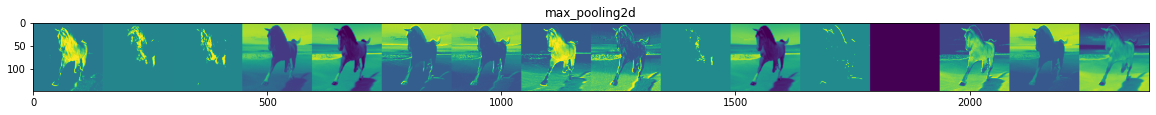

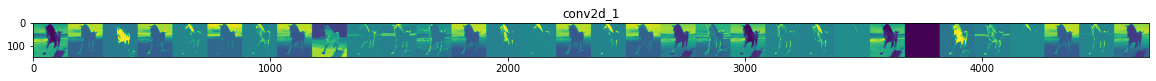

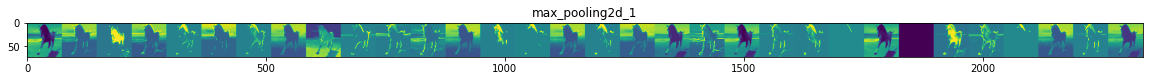

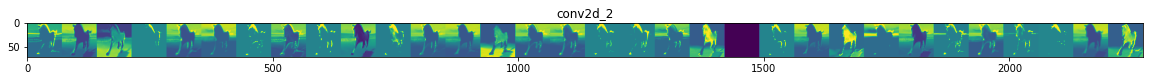

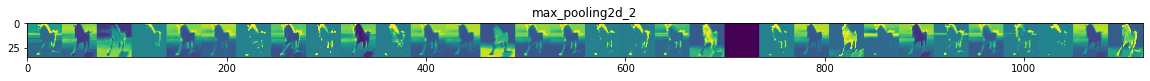

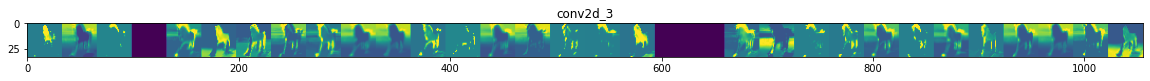

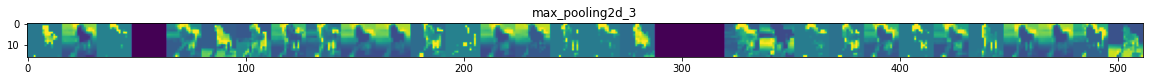

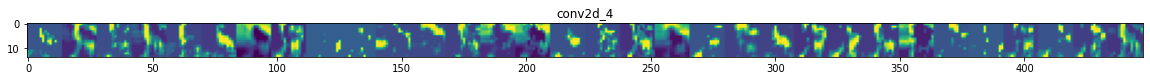

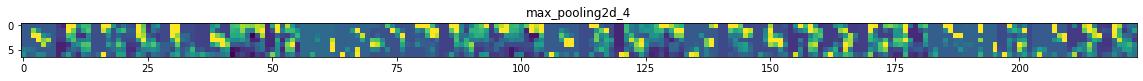

In [21]:
import numpy as np
import random
from tensorflow.keras.utils import img_to_array, load_img

# Defining a new model that will take an image as input, and will output intermediate representation for all layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

# Preparing random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))    # this is a PIL image
x = img_to_array(img)   #NumPy array with shape(300, 300, 3)
x = x.reshape((1,) + x.shape)   # NumPy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Ru the image through the network, thus obtaining all intermediate representation for the image
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so we can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representation
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Doing this for Conv / MaxPool layer and not for fully-connected layers
    n_features = feature_map.shape[-1]    # Number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]

    # Tile the images in the matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')

      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x

    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

## Clean Up

Before running the next exercise, run the following cell to terminate the kernel and free memory resources:

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)